
<img src="img/logo_wiwi.png" width="25%" align="left">

<img src="img/decision_analytics_logo.png" width="17%" align="right">



<br><br><br><br><br><br><br><br>



# Algorithmen und Datenstrukturen(A+D)-Projekt 

**Sommersemester 2023**


# 2. Ein Greedy-Verfahren für das TSP, Projektthemen

<br>

<br>
<br>

**J-Prof. Dr. Michael Römer, Till Porrmann**

Juniorprofessur für Decision Analytics  | Universität Bielefeld

In [20]:
import matplotlib.pyplot as plt
import numpy as np

## Was machen wir heute?

- wir implementieren einen Greedy-Algorithmzus für das TSP (nearest neighbor)
- wir implementieren eine Multi-Start-Variante
- wir lernen die Projektthemen vor und bilden eventuell schon Gruppen



# Wiederholung aus  der Vorlesung: Greedy-Verfahren 

## Was tun, wenn für ein Optimierungsproblem kein effizienter Algorithmus bekannt ist?

- für viele NP-harte Probleme wie das das Shortest Hamiltonian Path-Problem (SHPP) und das Traveling Salesperson-Problem (TSP) sind keine effizienten Algorithmen bekannt
- was kann man tun, wenn man dennoch ein großes TSP, z.B. mit 10000 Städten lösen möchte?

#### Idee: Man gibt die Optimalitätsforderung auf!

Wenn man es nicht schafft, in kurzer Zeit eine exakte / optimale Lösung zu finden,
- kann man versuchen, in kurzer Zeit eine **gute** Lösung zu finden!
- Verfahren, die das für Optimierungsprobleme versuchen, nennt man **Heuristiken**
- ein besonders einfacher und allgemeiner Ansatz nennt sich **Greedy-Verfahren** (greedy = gierig)
 - diesen Ansatz werden wir nun näher betrachten

## Rückblick: Greedy für das Rucksackproblem

- die "naive" Variante hat nicht gut funktioniert
- die Variante mit Sortierung der Items in absteigender Reihenfolge des Quotienten aus Wert und Gewicht hat erstaunlich gut funktioniert - wir waren nicht weit vom Optimum entfernt

**Betrachten wir doch nun einmal das TSP!**

## Ein Greedy-Ansatz für das TSP / SHPP: Nearest-Neighbor

<img src="./img/32.png" width="20%" align="right">


Eine einfache und sehr bekannte Heuristik für das SHPP (und das TSP) nennt sich **nearest neighbor**:
- man startet bei einem Knoten und
- wählt in jedem Schritt immer den Knoten aus, der dem aktuellen am nächsten ist:

Beispiel rechts: wir starten in Marin und suchen immer den nächsten Nachbarn

## TSP in Python: Distanzmatrix

- die einzige Information, die wir für die Darstellung des TSP brauchen, ist eine **Distanz-Matrix**
- in dieser (symmetrischen) Matrix steht in jedem Element $[i,j]$ die Distanz zwischen den Knoten (Orten) $i$ und $j$
- als Beispiel betrachten wir folgende Matrix:


In [21]:
distance_matrix = np.array([
    [0,  5, 4, 10],
    [5,  0, 8,  5],
    [4,  8, 0,  3],
    [10, 5, 3,  0]
])

## Nearest Neighor in Python: Überblick

**Wie funktioniert der Algorithmus?**

**Eingabe:** Distanzmatrix, Startknoten

- aktueller Knoten `node` := Startknoten
- Solange noch nicht alle Knoten besucht wurden:
  - bestimme den **noch nicht besuchten** Knoten **mit kürzester Distanz** von `node`
  - füge den Knoten zur Tour (Liste der besuchten Knoten) hinzu

**Die Länge der Tour** berechnet sich dann als:
- Distanz zwischen jedem Knoten und Nachfolger in der Tour
    - wobei der Nachfolger des letzen Knotens der Startknoten ist
- diese Berechnung kann natürlich "on-the-fly" im Nearest-Neighbor-Algorithmus berechnet werden

## Hilfsfunktion: `select_nearest_neighbor`

- wir lagern die Bestimmung des nächsten Nachbarn aus in eine eigene Funktion


In [22]:
def select_nearest_neighbor(tour, distance_matrix):
    
    # node ist der letzte Knoten der tour
    node = tour[-1]
    
    smallest_distance = 9999999999 ## grosser Wert
    nearest_neighbor = 0
    
    #Anzahl an Knoten = Dimension der Distanzmatrix
    for neighbor in range(len(distance_matrix)):
        
        if neighbor in tour:
            continue
            
        if distance_matrix[node][neighbor] < smallest_distance:
            nearest_neighbor = neighbor
            smallest_distance = distance_matrix[node][neighbor]            
       
    return nearest_neighbor, smallest_distance 

## Implementierung des Nearest-Neighbor-Algorithmus



In [23]:
   
def tsp_nearest_neighbor(start_node, distance_matrix ):
    
    tour = [start_node]
    total_distance = 0
    
    #solange die sequenz noch nicht alle Knoten umfasst
    while len(tour) < len(distance_matrix):
        
        node, distance = select_nearest_neighbor(tour, distance_matrix )
        
        tour.append(node)
        total_distance += distance
        
    total_distance += distance_matrix[tour[-1], tour[0]]
    return tour, total_distance


..probieren wir es aus:

In [24]:
tour, distance = tsp_nearest_neighbor(0, distance_matrix)
distance

17

><div class="alert alert-block alert-info">
<b>Wie können wir diesen Algorithmus durch geschickte Wahl einer Datenstruktur verbessern?</b></div>  


## Eine Routine zum Evaluieren einer Lösung

- immer wenn man nicht-triviale Algorithmen für Optimierungsprobleme entwickelt, sollte man einen "Solution-Checker" schreiben / nutzen

><div class="alert alert-block alert-info">
<b>Was ist im Fall des TSP zu prüfen?</b></div>  


**Im Fall des TSP gilt es:**
- zu prüfen, ob
  - die Lösung die Richtige Anzahl an Knoten enthält
  - dass es sich bei der Lösung tatsächlich um eine Permutation der Indizes handelt (kein Index kommt zweimal vor)
- die Distanz der Tour zu berechnen

In [25]:
def evaluate_tsp_solution(distance_matrix, tour):
    n = len(distance_matrix)
    if len(tour) != n:
        print ("Wrong number of nodes")
        return -1
     # Menge der Lösungsindizes muss = der Menge der Indizes von 0 bis n-1 sein
    if set(tour) != set(range(n)):
        print ("Not a proper tour!")
        return  -1
    
    total_distance = 0
    for i in range(n):
        if i < n-1:
            total_distance += distance_matrix[tour[i],tour[i+1]]
        else:
            total_distance += distance_matrix[tour[i],tour[0]]   
            
    return total_distance    

...probieren wir es aus:

In [26]:
tour[0] = tour[1]
evaluate_tsp_solution(distance_matrix, tour)

Not a proper tour!


-1

## Erweiterung: Evaluation zum Überprüfen einer gegebenen Distanz

- oftmals ist es nützlich, in einer Funktion direkt die vom Algorithmus berechnete Distanz zu prüfen
- folgende Funktion macht eine entsprechende Ergebnisausgabe:


In [27]:
def print_obj_and_eval_tsp_solution(distance_matrix, tour, distance):
    
    eval_distance = evaluate_tsp_solution(distance_matrix, tour)
    
    if distance == eval_distance:
        print ("Solution feasible, distance is: ", distance)
    elif eval_distance < 0:
        print("Solution infeasible")
    else: 
        print("Solution feasible, wrong distance: ", distance, " evaluation gave ", eval_distance)

...probien wir es aus:

In [28]:
print_obj_and_eval_tsp_solution(distance_matrix, tour, distance)

Not a proper tour!
Solution infeasible


## Auch hier gilt: Wir wollen weg von den "Sandkasten-Instanzen"



<img src="https://pup-assets.imgix.net/onix/images/9780691163529.jpg" width="20%" align="right">

- das TSP ist eines der bekanntesten Probleme der Informatik

- viele Ideen in der  kombinatorische Optimierung wurden zuerst für das TSP entwickelt
- **Buchtipp:**  [In Pursuit of the Traveling Salesman](https://press.princeton.edu/books/paperback/9780691163529/in-pursuit-of-the-traveling-salesman)
 - die Geschichte des TSP aus Sicht eines der Protagonisten (William Cook)
- Webseite zum TSP: https://www.math.uwaterloo.ca/tsp/index.html
- und, wie beim Rucksackproblem, **viele Probleminstanzen**
    - es gibt ganze Bibliothek von Instanzen, die so genannte [TSPLib](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/)
    - einige davon befinden sich im Repository / Zip zu diesen Folien
    - [hier](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html) finden Sie optimale Lösungswerte 

**..und sogar  ein ganzes Python-Paket: `python-tsp`** 


## Das Python-Paket `python-tsp`

siehe: https://github.com/fillipe-gsm/python-tsp

### bietet:
- Funktionen zum Einlesen von TSP-Instanzen im tsplib-format
  
  
  

In [29]:
from python_tsp.distances import tsplib_distance_matrix

tsplib_file = "./../instances/tsp/a280.tsp" # optimale Lösung 2579 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
#tsplib_file = "./../instances/tsp/brazil58.tsp" # optimale Lösung 25395 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)
#tsplib_file = "./../instances/tsp/berlin52.tsp" # optimale Lösung 7542 (lt. http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/STSP.html)

distance_matrix = tsplib_distance_matrix(tsplib_file)

- heuristische TSP-Algorithmen:
  - z.B. local search und simulated annealing

In [30]:
from python_tsp.heuristics import solve_tsp_local_search, solve_tsp_simulated_annealing

In [31]:
%%time
tour, distance = solve_tsp_simulated_annealing(distance_matrix)
distance

CPU times: total: 42.7 s
Wall time: 42.7 s


2989

- exakte TSP-Algorithmen basierend auf Enumeration und dynamischer Programmierung
  - (vorsicht: dauert wahrscheinlich lange mit Instanzen > 10 Items)

In [32]:
from python_tsp.exact import solve_tsp_dynamic_programming

#tour, distance = solve_tsp_dynamic_programming(distance_matrix_21)

#distance

## Wie gut ist Greedy / Nearest Neighbor?

Wie gut ist im Vergleich unser Nearest-Neigbor-Verfahren?

In [33]:
%%time

tour, distance = tsp_nearest_neighbor(0, distance_matrix)

print ("Distance:", distance, "Evaluated: " , evaluate_tsp_solution(distance_matrix, tour) )

Distance: 3157 Evaluated:  3157
CPU times: total: 93.8 ms
Wall time: 89.1 ms


## Erste Verbesserungsidee: Multi-Start-Greedy

- das Ergebnis der Greedy-Heuristik ist offenbar nicht sehr gut
- **aber:** die Greedy-Heuristik ist schnell - es ist nicht teuer, sie aufzurufen
  - dies kann man nutzen, um verbesserte Heuristiken "um Greedy-Vefahren herum" zu bauen

**Erste einfache Idee: Starte Greedy mit verschiedenen (allen) Startknoten** 
- die Nearest-Neighbor-Heuristik hat für unterschiedliche Startpunkte unterschiedliche Werte



In [34]:
def nearest_neighbor_multi_start(distance_matrix):

    best_distance = 999999
    best_tour = None
    for start_node in reversed(range(len(distance_matrix))):
        tour, distance = tsp_nearest_neighbor(start_node, distance_matrix)
        if distance < best_distance:
            best_distance = distance
            best_tour = tour         

    return best_tour, best_distance  

In [35]:
%%time

tour, distance = nearest_neighbor_multi_start(distance_matrix)
print_obj_and_eval_tsp_solution(distance_matrix,tour, distance)

Solution feasible, distance is:  2975
CPU times: total: 23.2 s
Wall time: 23.2 s


## Zwischenfazit


#### Inhaltlich haben wir heute:
- das TSP betrachtet und nearest neigbor als Beispiel für ein Greedy-Verfahren
- Multi-Start-Verfahren kennengelernt und ausprobiert
- Vergleiche mit einem Python-Paket für das TSP durchgeführt






# Organisatorisches: Projektthemen und -gruppen





## Wiederholung: Ziele des Kurses

Im Kurs 
- vertiefen Sie Ihre Kenntnisse aus der Vorlesung und wenden diese auf eine konkrete Fragestellung an
- sammeln Sie vertiefte Erfahrungen mit der praktischen Implementierung 
- üben Sie, im Team zu arbeiten
- lernen Sie, mit Varianten von Algorithmen zu experimentieren, um
  - Algorithmen weiterzuentwickeln
  - eine geeignete Variante auszuwählen
- lernen Sie **grundlegende Prinzipien und Denkweisen von (KI)-Suchverfahren, insbesondere (Baum-)Suchverfahren (Tree Search)** kennen, die die Grundlage für **fortgeschrittene Methoden**, z.B.  *Metaheuristiken* oder *Reinforcement Learning* bilden




## Wiederholung: Lernformate

In **Präsenzveranstaltungen** werden Inhalte vermittelt, die für das Projekt relevant sind: 
- anhand von Beispielen werden algorithmische Prinzipien erläutert, die im Projekt angewendet und verfeinert werden können
- erweiterte Techniken und Pakete in Python, die nützlich sein können
- Einlesen von Probleminstanzen und Experimentieren mit Algorithmen
- ggf. Tools zum gemeinsamen Entwickeln von Code


In **Projektarbeiten** 
- arbeiten Sie in Gruppen von idealerweise **3-4 Personen** gemeinsam an der Entwicklung und Implementierung
- an einem Problem der **kombinatorischen Optimierung**
- jede Gruppe wird **von einem Dozenten** betreut, mit dem regelmäßige Treffen vereinbart werden sollten

In **zwei Präsentationen je Gruppe** werden
- Zwischenergebnisse und Abschlussergebnisse vorgestellt

In einem **gemeinsamen Projektbericht** werden
- die Projektergebnisse aufbereitet und
- wissenschaftliches Schreiben geübt



## Die Projekte

**Es gibt drei verschiedene Projektthemen:**
- Bin Packing 
- Generalized Assignment
- Singe Machine Scheduling

**Jedes Projektthema** 
- ist ein kombinatorisches Optimierungsproblem
- für das es relativ einfache Greedy-Ansätze gibt,
- die die Basis für einen im Projekt zu entwickelnden Algorithmus, z.B. auf Basis einer Baumsuche, bildet
  - Sie können auch andere Ansätze nutzen, wenn Sie mögen!



**Die Bearbeitung**
- erfolgt in Kleingruppen von 3-4 Personen
- dabei werden Themen auch doppelt vergeben
- wir würden, wenn möglich, die Projektgruppen gern schon heute bilden







## Thema 1: Bin Packing

Im **Bin Packing Problem** (deutsch: **Behälterproblem**) sind gegeben:
- eine gegebene Menge $I$ an Gegenständen (*items*) mit verschiedenen Gewichten $w_i$ je $i \in I$
- ein Behältertyp (*bin*) mit einer Kapazität (maximales Gewicht je Behälter) $b$ 

**Ziel** ist es, **alle** Gegenstände in eine **möglichst geringe** Anzahl von Behältern zu packen



#### Beispiel:

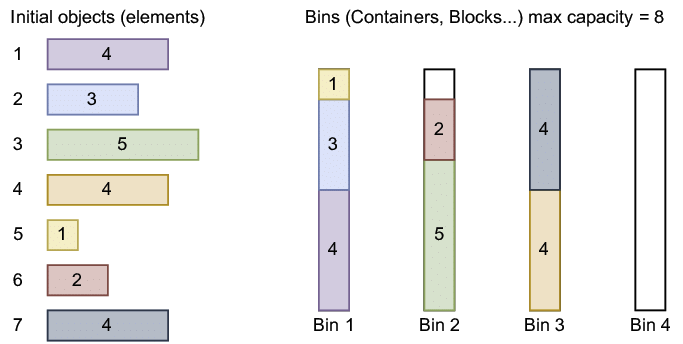

Quelle: Chabri et al. (2022) DOI: 10.11591/ijece.v12i3.pp3226-3237

## Thema 1: Bin Packing - Instanzen und Code

- Instanzen und Referenzen finden Sie z.B. unter: https://site.unibo.it/operations-research/en/research/bpplib-a-bin-packing-problem-library
- Python-Bibliotheken:
  - `binpacking`: https://github.com/benmaier/binpacking
  - `prtpy`: https://github.com/erelsgl/prtpy/blob/main/examples/packing_algorithms.md


## Thema 2: Generalized Assignment

Im **Generalized Assignment Problem** sind gegeben:

- eine gegebene Menge $I$ an Aufgaben (*tasks*)
- eine gegebene Menge $J$ an Mitarbeiter\*innen (*agents*) mit verschiedenen (z.B. zeitlichen) Kapazitäten $b_j$ je $j \in J$
- einen Aufwand $a_{ij}$ (z.B. Ausführungszeit), der durch die Zuordnung der Aufgabe $i$ an Mitarbeiter\*in $j$ entsteht
- Kosten $c_{ij}$ (z.B. aufgrund von Ergebnisqualität), die durch die Zuordnung der Aufgabe $i$ an Mitarbeiter\*in $j$ entstehen


**Ziel** ist es, **alle** alle Aufgaben so an Mitarbeiter\*innen zu verteilen, dass 
- die Kapazitäten der Mitarbeiter\*innen nicht überschritten werden und
- die Gesamtkosten der Zuordnung minimiert werden (manchmal wird das Problem auch als Maximierungsproblem formuliert)


<img src="./img/gap.png" width="50%" align ="center" >

Quelle: https://github.com/shunji-umetani/gap-solver

## Thema 2: Generalized Assignment - Instanzen und Code

- Instanzen z.B. unter: http://www.al.cm.is.nagoya-u.ac.jp/~yagiura/gap/
- Python-Code (mit Instanzen) unter: https://github.com/shunji-umetani/gap-solver


## Thema 3: Single Machine Scheduling with Sequence-Dependent Setup Times

- ein Problem der Maschinenbelegungsplanung


**Gegeben sind:**
- eine Maschine 
- eine Menge $J$ an Aufträgen (*jobs*)
- jeder Job hat 
  - eine Bearbeitungszeit (*completion time*) $c_j$
  - einen Fertigstellungstermin (*due date*) $d_j$ 
  - ein Gewicht (*weight*) $w_j$, das die Wichtigkeit des Jobs determiniert
- reihenfolgeabhängige Rüstzeiten (sequence-dependent setup times) $s_{j,j'}$: Zeit, die nach Bearbeitung von Job $j$ benötigt wird, um Job $j'$ bearbeiten zu können
   - z.B. Umbauarbeiten an Schneidemaschinen, Reinigung von Düsen bei Farb-Aufdrucken, etc.

**Ziel:**
- Minimierung der **gesamten gewichteten Terminüberschreitung** (Verspätung) (*total weighted tardiness*)
  - Verspätung $T_j$ eines Jobs: $\max$(tatsächliche Fertistellungszeit - $d_j$, 0)
  - gewichtete Verspätung: $w_j T_j$
  - Gesamte Zielfunktion: $\min \sum_{j \in J} w_j T_j$
  
**Wesentliche Restriktionen:**
- ein Arbeitsgang kann erst gestartet werden, wenn der vorherige abgeschlossen wurde
- die Maschine kann immer nur einen Arbeitsgang zu einer Zeit ausführen
- ein Arbeitsgang kann nicht unterbrochen werden (ist er einmal angefangen, muss er zuende gebracht werden)

## Thema 3: Single Machine Scheduling with Sequence-Dependent Setup Times
**Beispiel**

<img src="https://3.bp.blogspot.com/-SqH9CPhvbxM/W6Hve0BpVNI/AAAAAAAAIrg/VVk4aRcLzkYB7aPRont5MRivNvK19i2pgCLcBGAs/s1600/setup.PNG" width="50%" align ="center" >

Quelle: http://yetanothermathprogrammingconsultant.blogspot.com/2018/09/scheduling-sequence-dependent-setup.html

#### Instanzen und Code
- Probleminstanzen: https://www.cicirello.org/datasets/wtsds/, https://github.com/cicirello/scheduling-benchmarks/tree/master/wtsds
- Beschreibung der Instanzen: https://www.cicirello.org/publications/wtsbenchmarks.pdf
- optimale Lösungswerte: https://sites.google.com/site/shunjitanaka/smtwtss
- Code für verwandte Probleme: 
  - Scheduling Python Toolkit: https://github.com/framinan/scheptk
  - pyScheduling: https://github.com/scheduling-cc/pyscheduling 

## Gruppen- und Themenzuordnung

|Gruppe | Thema | Gruppenmitglieder 
|-|:-|:-|
|1| Bin Packing | 
|2| Bin Packing | 
|3| Generalized Assignment | 
|4| Generalized Assignment | 
|5| Machine Scheduling | 
|6| Machine Scheduling| 

